In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF
from mbbo.output import format_for_submission

Text(0.5, 0, 'Output')

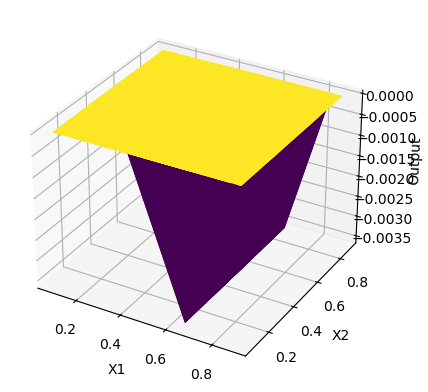

In [3]:
#mesh plot
ary1_in = np.load('../data/raw/initial_data/function_1/initial_inputs.npy')
ary1_out = np.load('../data/raw/initial_data/function_1/initial_outputs.npy')

x = ary1_in[:, 0]
y = ary1_in[:, 1]

X, Y = np.meshgrid(x, y)

# Reshape the output to fit the meshgrid layout for the surface plot
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[j, i] = ary1_out[i]  


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Output')

In [3]:
random.seed(51)
np.random.seed(51)

week1_out = [0.0, -0.03634716524130564, -0.13995571712281177, -11.512791229057324, 351.7115420928652, -0.5971511450896173, 0.2910786825809617, 8.618272750952901]
week1_in = [np.array([0.00367, 0.9999 ]), 
            np.array([0.851999, 0.973204]), 
            np.array([0.747032, 0.28413 , 0.226329]), 
            np.array([0.169128, 0.756136, 0.275457, 0.528761]), 
            np.array([0.439601, 0.772709, 0.376277, 0.933269]), 
            np.array([0.232204, 0.132714, 0.53824 , 0.760706, 0.075595]), 
            np.array([0.476821, 0.248196, 0.242816, 0.576157, 0.162416, 0.290926]), 
            np.array([0.221603, 0.703755, 0.674607, 0.130295, 0.376739, 0.669444, 0.136655, 0.061316])]    

week2_out = [-1.2075460499722905e-18, 0.17608630702211278, -0.17239781799687137, -31.982880235497266, 1236.8846557000643, -2.451406055102475, 0.00010805707939840242, 5.178959940699899]
week2_in = [np.array([0.476035, 0.572563]), 
            np.array([0.641846, 0.498841]), 
            np.array([0., 0., 0.]), 
            np.array([0.953433, 0.895217, 0.812477, 0.618719]), 
            np.array([0.987523, 0.470227, 0.946409, 0.105412]), 
            np.array([3.40696e-01, 4.94179e-01, 2.10000e-05, 3.08050e-02, 9.39958e-01]), 
            np.array([0.88314 , 0.756642, 0.      , 0.      , 0.9     , 0.942719]), 
            np.array([0.993634, 0.968223, 0.979285, 0.397318, 0.965856, 0.955218, 0.006078, 0.024001])]

week3_out = [-2.118633970077695e-95, -0.1068943462941895, -0.005838531351604155, -2.6718044713157307, 32.0025, -1.4580645404618957, 0.4892165178828796, 9.9417237968706]

week3_in = [np.array([0.127849, 0.198491]), 
            np.array([0.246077, 0.656597]), 
            np.array([0.492581, 0.611593, 0.5     ]), 
            np.array([0.510358, 0.521985, 0.383995, 0.445439]), 
            np.array([0.5, 0.5, 0.5, 0.5]), 
            np.array([0.66336 , 0.      , 0.999999, 0.332984, 0.      ]), 
            np.array([0.      , 0.165185, 0.28681 , 0.      , 0.318109, 0.999999]), 
            np.array([0.119265, 0.254466, 0.117275, 0.24563 , 0.548426, 0.553172,  0.230111, 0.516062])]

week4_out = [-8.306597721001677e-27, 0.715790799340666, -0.00506242600241439, -3.2126105576284227, 31.94090504001378, -0.9205277885179105, 0.3911680928412005, 9.6899612812574]

week4_in = [np.array([0.24001 , 0.357107]),
                np.array([0.5, 0.5]), 
                np.array([0.5, 0.5, 0.5]), 
                np.array([0.549669, 0.508442, 0.413776, 0.413008]), 
                np.array([0.500102, 0.500102, 0.500102, 0.500102]), 
                np.array([0.563405, 0.      , 0.83134 , 0.999999, 0.      ]), 
                np.array([0.      , 0.626234, 0.280125, 0.      , 0.36777 , 0.451863]), 
                np.array([0.275027, 0.304704, 0.160147, 0.328388, 0.419169, 0.578759, 0.436166, 0.614079])]

week5_out = [1.517648729565899e-192, 0.509599138595138, -0.025681820315624142, -4.078914281244423, 629.9338529410855, -1.747233852094004, 0.39256467139392903, 9.7675674964181]

week5_in = [np.array([0.999999, 0.999999]), np.array([0.666698, 0.666698]), np.array([0.558875, 0.558874, 0.558875]), np.array([0.523385, 0.494608, 0.22783 , 0.357468]), np.array([0.932544, 0.415248, 0.89143 , 0.050433]), np.array([0.      , 0.687353, 0.      , 0.999999, 0.      ]), np.array([0.      , 0.56895 , 0.354465, 0.290165, 0.482077, 0.989692]), np.array([0.      , 0.047944, 0.315163, 0.115808, 0.571106, 0.59513 ,
       0.376754, 0.548807])]

def get_function_data(function_number):
    ary_in = np.load(f'../data/raw/initial_data/function_{function_number}/initial_inputs.npy')
    ary_out = np.load(f'../data/raw/initial_data/function_{function_number}/initial_outputs.npy')

    

    ary_out=np.append(ary_out, week1_out[function_number-1])
    ary_out=np.append(ary_out, week2_out[function_number-1])
    ary_out=np.append(ary_out, week3_out[function_number-1])
    ary_out=np.append(ary_out, week4_out[function_number-1])
    ary_out=np.append(ary_out, week5_out[function_number-1])
    ary_in=np.vstack((ary_in, week1_in[function_number-1]))
    ary_in=np.vstack((ary_in, week2_in[function_number-1]))
    ary_in=np.vstack((ary_in, week3_in[function_number-1]))
    ary_in=np.vstack((ary_in, week4_in[function_number-1]))
    ary_in=np.vstack((ary_in, week5_in[function_number-1]))
    
    return ary_in, ary_out

class FunctionInfo():
    rbf_lengthscales = [0.8, 0.001, 0.016, 0.337, 0.0162, 0.68, 0.644, 1.0 ] # functions 2 and 8 didn't find optimal lengthscale in training
    ucb_kappas = [0.1, 1.1, 0.00001, 0.8, 0.4, 0.8, 0.8, 0.8] # only got successful calibration for first 3. Default to 0.8 for the rest (high because still exploring) 
                                                              # - except function 5 which is unimodal so can exploit more.
                                                              # Function 3 - aim is to reduce bad side effects of drug combination - have a maximum around 0.5,0.5,0.5 so from week 5 on, exploiting that
    perturb_max_starts = [0,0,0,0,-0.055,0,0,0] #having trouble getting function 5 to explore a little more away from its maximum - nudge
    kernel_params_list=[{"class": "RationalQuadratic", "alpha": 0.4},
                   {"class": "RationalQuadratic", "alpha": 1.0},
                   {"class": "RationalQuadratic", "alpha": 1.0},
                   {"class": "RationalQuadratic", "alpha": 1.0}, #f4 - all NaN
                   {"class": "RationalQuadratic", "alpha": 1.4}, #f5 = mainly NaN
                   {"class": "Matern52", "nu":2.5}, #f6 - mainly NaN
                   {"class": "RationalQuadratic", "alpha": 1.0},
                   {"class": "RationalQuadratic", "alpha": 1.0}]

    def __init__(self, function_number):
        self.function_number = function_number
        function_ix = function_number - 1
        self.kernel_lengthscale = self.rbf_lengthscales[function_ix]
        self.ucb_kappa = self.ucb_kappas[function_ix]
        self.kernel_params = self.kernel_params_list[function_ix]
        self.perturb_max_start = self.perturb_max_starts[function_ix]


In [4]:
#Output to CSV
interim_folder = '../data/interim'
for i in range(1,9):
    ary_in, ary_out = get_function_data(i)
    combined = np.append(ary_in, ary_out.reshape(-1,1), axis=1)
    np.savetxt(f'{interim_folder}/function_{i}.csv', combined, delimiter=',')



In [12]:
def scale_f1(values):
    # Step 1: Replace zeros with a small positive value to avoid log(0)
    epsilon = 1e-200  # A very small number
    values_safe = np.where(values == 0, epsilon, values)

    # Step 2: Take the logarithm of absolute values
    log_values = np.log10(np.abs(values_safe))

    # Step 3: Direct Min-Max Normalization to [0, 1]
    log_min, log_max = np.min(log_values), np.max(log_values)
    scaled_values = (log_values - log_min) / (log_max - log_min)  # Normalization to [0,1]

    # Step 4: Restore signs
    return np.sign(values) * np.abs(scaled_values)

f1_in, f1_out = get_function_data(1)
f1_out_scaled = scale_f1(f1_out) 
for original, scaled in zip(f1_out ,f1_out_scaled):
    print(f"Original: {original:.2E} -> Scaled: {scaled:.4f}")

Original: 1.32E-79 -> Scaled: 0.6131
Original: 1.03E-46 -> Scaled: 0.7796
Original: 7.71E-16 -> Scaled: 0.9359
Original: 3.34E-124 -> Scaled: 0.3874
Original: -3.61E-03 -> Scaled: -1.0000
Original: -2.16E-54 -> Scaled: -0.7407
Original: -2.09E-91 -> Scaled: -0.5534
Original: 2.54E-40 -> Scaled: 0.8119
Original: 3.61E-81 -> Scaled: 0.6052
Original: 6.23E-48 -> Scaled: 0.7734
Original: 0.00E+00 -> Scaled: 0.0000
Original: -1.21E-18 -> Scaled: -0.9217
Original: -2.12E-95 -> Scaled: -0.5331
Original: -8.31E-27 -> Scaled: -0.8804
Original: 1.52E-192 -> Scaled: 0.0414


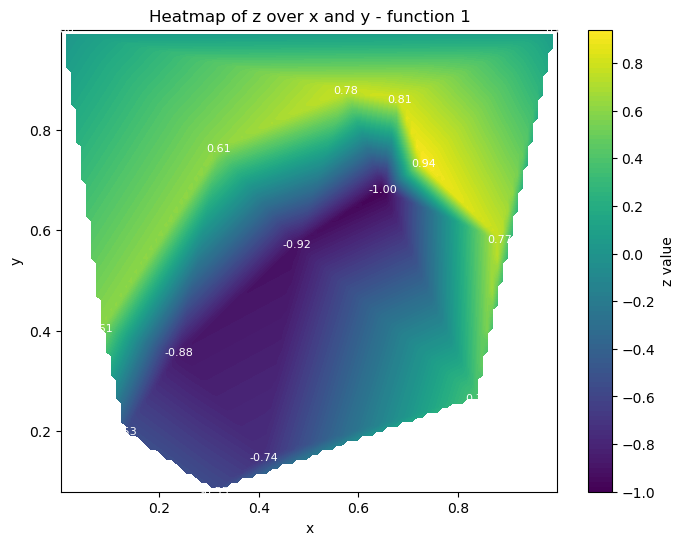

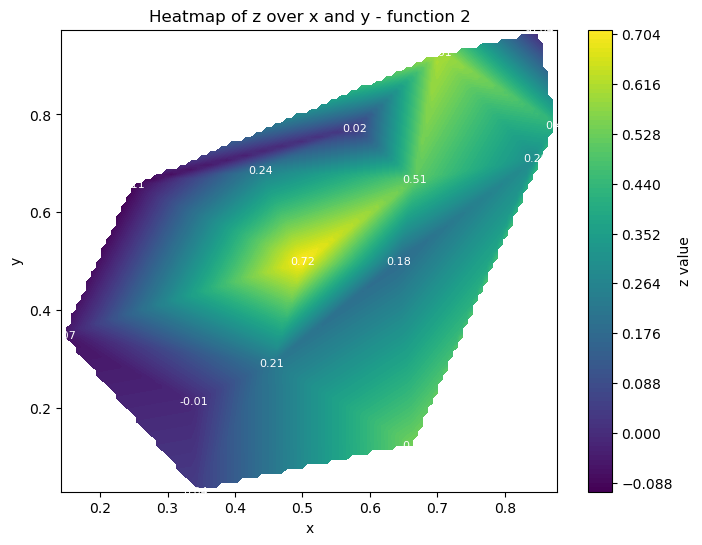

In [13]:
from scipy.interpolate import griddata

for i in range(1,3): #heatmaps of 2d functions
    ary_in, ary_out = get_function_data(i)
    x = ary_in[:, 0]
    y = ary_in[:, 1]
    z = ary_out

    if i==1:
        z = scale_f1(z) #apply scaling to f1 because of small values

    grid_x, grid_y = np.meshgrid(
        np.linspace(x.min(), x.max(), 100),
        np.linspace(y.min(), y.max(), 100)
    )

    # Interpolate the z values onto the grid
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')
    #grid_z = np.log10(-grid_z)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
    plt.colorbar(label='z value')
    for xi, yi, zi in zip(x, y, z):
        plt.text(xi, yi, f'{zi:.2f}', color='white', fontsize=8, ha='center', va='center')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Heatmap of z over x and y - function {i}')
    plt.show()

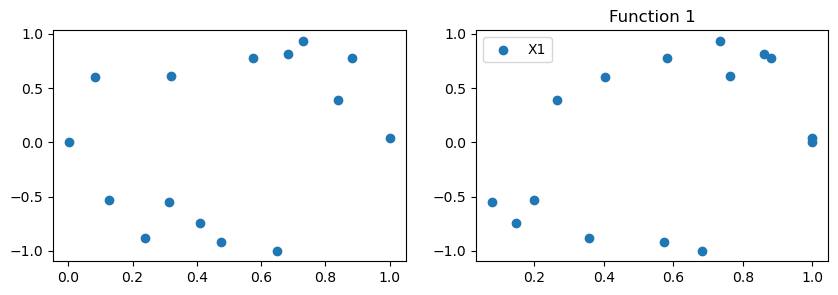

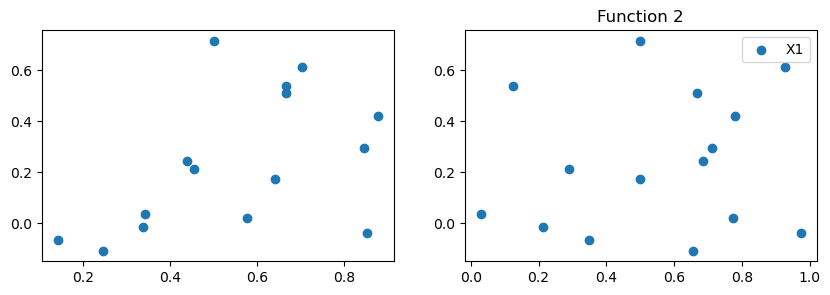

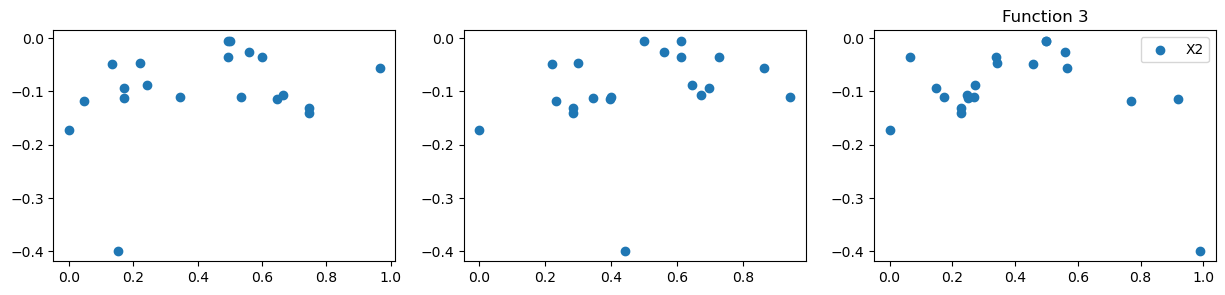

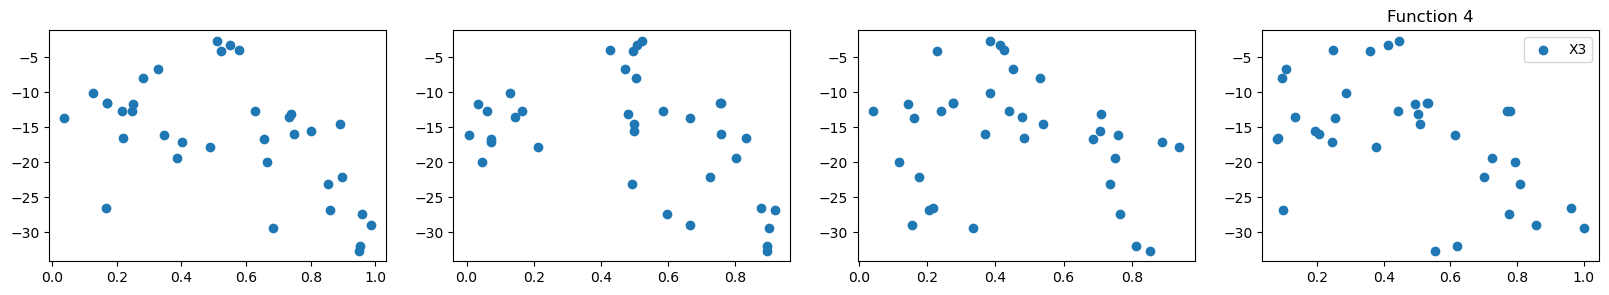

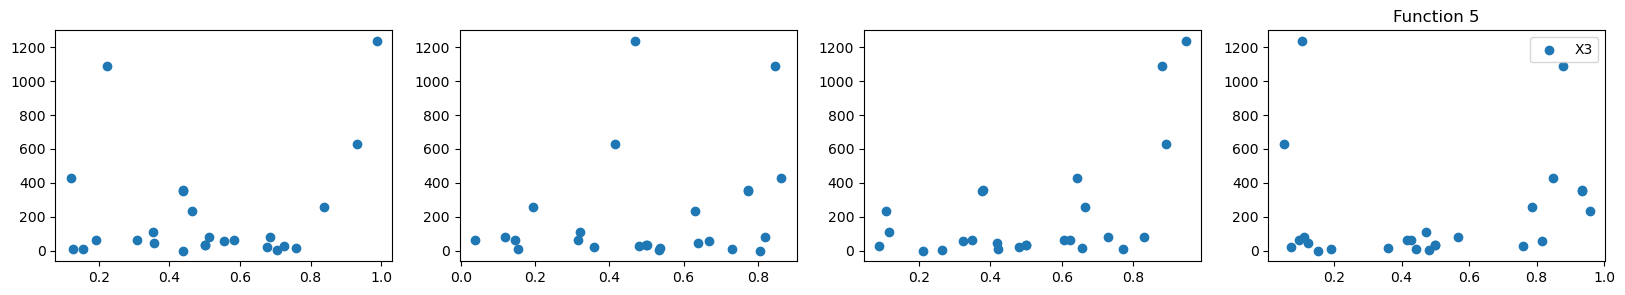

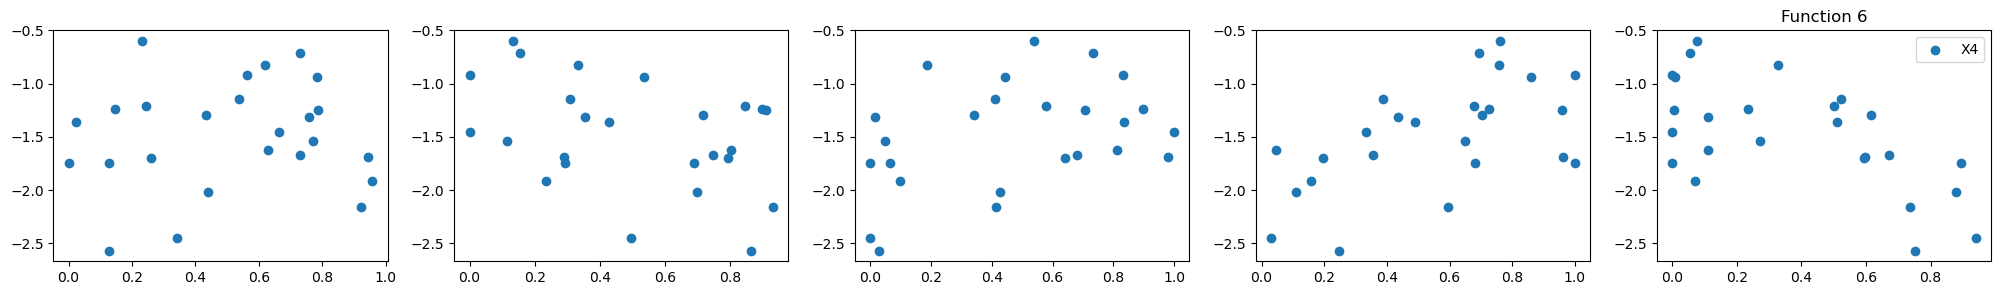

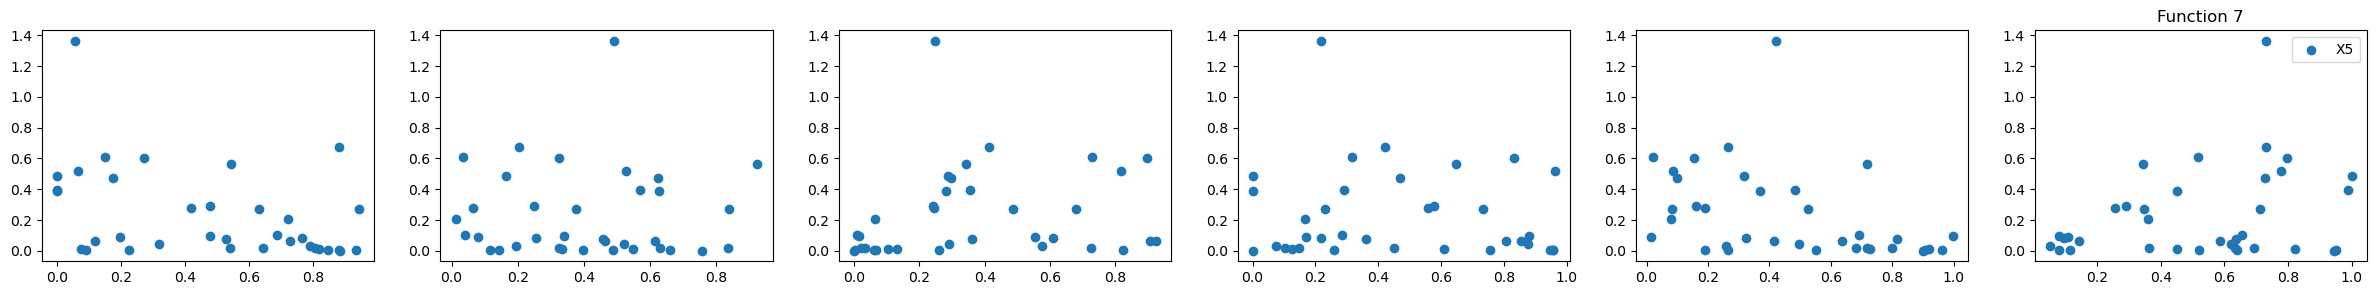

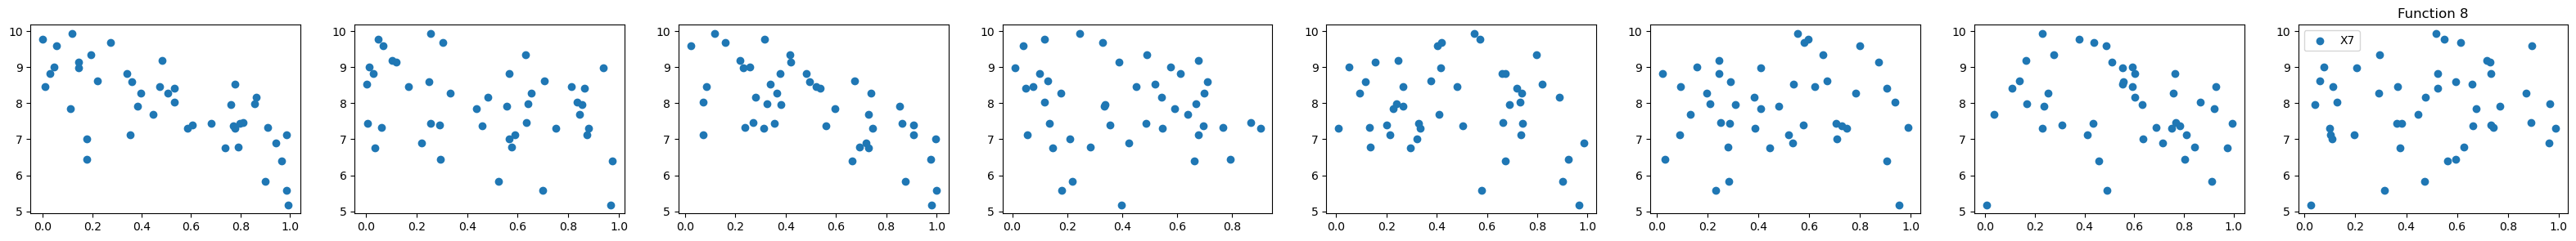

In [14]:



#Individual plot per parameter
for i in range(1,9):
    ary_in, ary_out = get_function_data(i)
    dimensions = ary_in.shape[1]
    fig, axes = plt.subplots(nrows=1, ncols=dimensions, figsize=(5 * dimensions, 3))
    if i==1:
        ary_out = scale_f1(ary_out) #apply scaling to f1 because of small values
    #fig.tight_layout()
    for x in range(0, dimensions):
        # sub = fig.add_subplot(1, dimensions, x+1)
        #sub.
        axes[x].scatter(ary_in[:, x], ary_out, label=f'X{x}')
        #sub.scatter(ary_in[:, x], ary_out, label=f'X{x}')
        #sub.xlabel(f'X{x}')
        #sub.ylabel('Output')
        # sub.title = f'Function {i} input {x}'
        #plt.savefig(f'../reports/figures/function_{i}_X{x}_vs_output.png')
    plt.title(f'Function {i}')    
    plt.legend()
    plt.show()

In [8]:
def create_n_dimensional_grid(dimensions, num_points = 1001):
    """
    Create a grid for n dimensions.
    
    Parameters:
    - dimensions: number of dimensions (n)
    - num_points: number of points along each axis
    
    Returns:
    - A 2D array of shape (n_points, n_dimensions) where each row is a point in the n-dimensional space.
    """
    # Create a list of n-dimensional grids in range 0-1
    grids = [np.linspace(0, 1, num_points) for _ in range(dimensions)]
    
    # Create the n-dimensional meshgrid and then stack the ravel-ed grids together
    meshgrid = np.meshgrid(*grids)
    
    # Flatten the meshgrid and stack it together to get a 2D array of shape (n_points, n_dimensions)
    X_grid = np.vstack([g.ravel() for g in meshgrid]).T
    
    return X_grid

In [9]:
# Gaussian Process Acquisition Function (Upper Confidence Bound)
def ucb_acquisition(x, model, kappa=2.0):
    """
    UCB acquisition function for Bayesian Optimization.
    
    Parameters:
    - x: Point at which to evaluate the acquisition function.
    - model: GaussianProcessRegressor model.
    - kappa: Controls the exploration vs exploitation trade-off.
    
    Returns:
    - UCB acquisition value at point x.
    """
    # Predict the mean and standard deviation
    mean, std = model.predict(x.reshape(1, -1), return_std=True)
    
    # UCB acquisition function
    return mean + kappa * std

def lcb_acquisition(x, model, kappa=2.0):
    mean, std = model.predict(x.reshape(1, -1), return_std=True)
    return mean - kappa * std

# Function to suggest the next query point
def suggest_next_point(bounds, function_number, model, kappa=2.0):
    """
    Suggest the next point to query using Bayesian Optimization with Gaussian Process.
    
    Parameters:
    - X_existing: Array of input points already observed (n_samples, n_features).
    - Y_existing: Array of corresponding output values (n_samples,).
    - bounds: Bounds for each input dimension (n_features, 2).
    - model: Pre-trained GaussianProcessRegressor model (if available).
    - kappa: Exploration-exploitation trade-off parameter for UCB.
    
    Returns:
    - Next input point to query.
    """

    # Define the acquisition function to minimize (negative UCB)
    def acquisition_wrapper(x):
        if function_number in [1,2,5,7,8]: #maximise
            return -ucb_acquisition(x, model, kappa)
        elif function_number == 4: # minimise
            return lcb_acquisition(x, model, kappa) 
        else:
            # closest to 0. Get highest abs of (ucb or lcb) and minimize that
            return max(abs(lcb_acquisition(x, model, kappa)), abs(ucb_acquisition(x, model, kappa)))  # Minimize the negative of the acquisition function
    
    # Minimize the acquisition function to find the next point
    start_point = np.random.uniform(bounds[:, 0], bounds[:, 1])
    #print (f"Start point = {start_point}")
    res = optimize.minimize(acquisition_wrapper, start_point, bounds=bounds, method='L-BFGS-B')
    
    # Return the next query point
    return res.x

def at_bound(x):
    if (0 in x) or (1 in x):
        return True
    return False

# Suggest next points for each function
for i in range(1,9):
    ary_in, ary_out = get_function_data(i)
    in_bounds = np.array([[0.0, 1.0]] * ary_in.shape[1])

    # fit gaussian process surrogate function
    kernel = RBF(length_scale=0.1, length_scale_bounds='fixed')
    #kernel = RationalQuadratic(length_scale=0.1, alpha=1.0)

    noise_assumption = 1e-1 # noise assumption, a hyper-parameter
    surrogate = GaussianProcessRegressor(kernel = kernel, alpha=noise_assumption)

    surrogate.fit(ary_in, ary_out)

    next_point = [0]
    while at_bound(next_point):
        next_point = suggest_next_point(in_bounds, i, surrogate, kappa=2)
        #print(f"Function {i} Considering next point: {next_point})")
    submit = format_for_submission(next_point)
    print (f"Function {i} Next point to submit: {submit}")    

Function 1 Next point to submit: 0.407426-0.459462
Function 2 Next point to submit: 0.403505-0.490617
Function 3 Next point to submit: 0.031119-0.888575-0.682375
Function 4 Next point to submit: 0.920303-0.560483-0.754863-0.787021
Function 5 Next point to submit: 0.758506-0.536377-0.655804-0.359997
Function 6 Next point to submit: 0.696577-0.718409-0.034297-0.785884-0.995966
Function 7 Next point to submit: 0.148882-0.512910-0.305068-0.447789-0.531591-0.088217
Function 8 Next point to submit: 0.156114-0.355166-0.840379-0.027094-0.771983-0.038278-0.821367-0.202728


In [10]:
#using skopt

from skopt import gp_minimize
from skopt.space import Real
from sklearn.gaussian_process.kernels import Matern

def surrogate_function(inputs):
    
    # Predict using the Gaussian Process surrogate model
    y_pred, stdev = gp.predict(np.atleast_2d(inputs), return_std=True)
    return y_pred[0]  # Minimizing

def make_search_space(dimensions):
    
    search_space = [Real(0.0, 1.0, name=f'x{i+1}') for i in range(dimensions)]
    return search_space

# [abs y/n], [-1 for maximise, 1 for minimise], acq_func, kappa
optimise_params = [
    [0, 1, "LCB", 10], #f1 - maximise exploration
    [0, 1, "LCB", 2], #f2 - maximise exploration - 
    [0, 1, "EI", 0], #f3 - measuring adverse reaction to drug. Surely 0 for all ingredients would minimise adverse reaction!
    [1, 1, "EI", 5], #f2 - minimize absolute value - maximise exploration - ideally would be LCB but that is returning the bounds
    [0, -1, "EI", 0], #f5 - unimodal (maximize exploitation) - maximise yield
    [1, 1, "EI", 0], #f6 - cake - minimise absolute value
    [0, 1, "LCB", 1], #f7
    [0, 1, "EI", 0] #f8
    ]

noise_level = 0.1

#for i in range(1,9):
for i in [7]:
    ary_in, ary_out = get_function_data(i)
    print("Shape of ary_in:", ary_in.shape)

    search_space = make_search_space(ary_in.shape[1])

    # Check if ary_in dimensions match the search space
    assert ary_in.shape[1] == len(search_space), (
        f"Input dimensions ({ary_in.shape[1]}) do not match the search space dimensions ({len(search_space)})."
    )

    kernel = Matern(nu=2.5)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

    gp.fit(ary_in, ary_out)

    p = optimise_params[i-1]
    ary_out_prepared = ary_out * p[1] # if we should maximise, negate the output values before minimising
    if p[0]: #Use absolute vals where appropriate
        ary_out_prepared = np.abs(ary_out_prepared)
    
    res = gp_minimize(
    func=surrogate_function,   # The objective function to minimize
    dimensions=search_space,  # The search space
    #acq_func="EI",           # Acquisition function (Expected Improvement)
    acq_func=p[2],
    kappa= p[3],    # High kappa favors exploration
    n_calls=ary_in.shape[0] * 2,               # Total number of queries allowed (including initial samples)
    x0=[list(x) for x in ary_in],             # Initial input samples
    y0=ary_out # Initial output samples (negated for maximization)
    )
    print(f"Function {i}")
    print("Best input values found:", res.x)
    print("Best output value observed:", res.fun)

    # Suggest the next point to evaluate
    suggested = np.array(res.x_iters[-1])
    print("Suggested next inputs to try:", format_for_submission(suggested))



Shape of ary_in: (31, 6)
Function 7
Best input values found: [0.8756120828494655, 0.7432457454118679, 0.0, 0.0, 1.0, 0.9290746674825612]
Best output value observed: -0.418419967669732
Suggested next inputs to try: 0.882386-0.734145-0.000000-0.000000-1.000000-0.922322
